# Computer Vison cơ bản (P4)

Bài này chúng ta sẽ bàn đến một số thuật toán nâng cao, một số thuật toán xử lý hình thái ảnh các bạn có thể tham khảo ở link trong các bài trước.

Bài này sẽ xét đến một số bài toán cụ thể trong Computer Vision thay vì các thuật toán mang tính cơ bản như các bài khác

Các thuật toán trong bài này nó ở độ phức tạp khác biệt so với phần trước nên nói chung bạn nào hiểu thì xem thêm, còn không hiểu thì áp dụng nha :>

## 1.Feature detection với OpenCV

Ví dụ như các bạn muốn tìm một đối tượng trong ảnh, hoặc là muốn tìm xem một ảnh có trong một tập các ảnh không, thì lúc này chúng ta sử dụng thuật toán feature matching để tìm các đặc điểm đặc biệt của một ảnh để so sánh với các phần khác, hoặc ảnh khác.

Ví dụ như các bạn phải tìm một phần của ảnh trong một ảnh lớn như vầy:

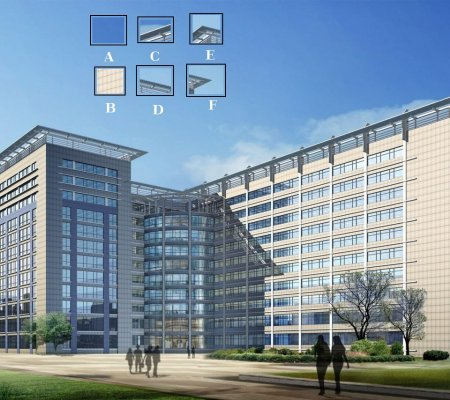

Các thuật toán trong họ thuật toán này là các thuật toán:
* SIFT
* ORB
* SURF
* Harris Corner Detection
* ...

Các thuật toán này có phần lý thuyết khá là nặng, mình nghĩ mình không đủ khả năng cover lại hết nên đây là link tham khảo, các ví dụ cũng được lấy từ đây: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html

### Thuật toán Harris Corner Detection

Thuật toán này dựa trên một "cửa sổ trượt" (sliding window):
![SegmentLocal](sliding.gif "segment")

Tức cũng gần giống như phép convolution, chúng ta thực hiện quét hết các phần của ảnh để detect tất cả các feature của ảnh. 

Trong trường hợp thuật toán Harris thì thứ ta cần tìm đó là cạnh của một đối tượng. Để làm điều này, hàm cửa sổ trượt của chúng ta cần phải như sau:

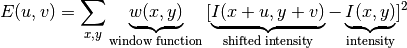
(Đáng sợ đúng không :>, mà đúng là đáng sợ thật đó :v )

Trong đó xuất phát ở điểm (u,v), chúng ta thực hiện phép sliding window W(x,y), sau đó tính "intensity" của ảnh tại các điểm khi ta dịch hình đi một đoạn (x,y). Hàm E(u,v) này là mức độ "khác biệt" giữa các điểm ảnh ở (u,v) so với các điểm ở khoảng cách giới hạn (x,y). Tức ta cần tìm điểm (u,v) sao cho hàm E(u,v) là lớn nhất, hay nói cách khác điểm (u,v) này nhiều khả năng là "góc" (conner) của một đối tượng nhất. Lưu ý chỗ  bình phương là để hàm không âm (mình nghĩ cũng có thể sử dụng trị tuyệt đối)

Để thực hiện điều này, trong paper người ta sử dụng phép khai triển Taylor để tính E(u,v) (dành cho các bạn tự hỏi học GT làm gì :> ) (dĩ nhiên là Taylor 2 chiều):


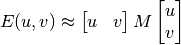


Với:

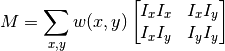

Là thành phần đạo hàm theo 2 chiều của ảnh (đạo hàm riêng), với đạo hàm này được tính bằng toán tử Sobel đã nói đến ở bài trước (tại sao nó tính được đạo hàm ? :v). Kết quả hàm này là một tổng các ma trận (2 * 2) nên kết quả cuối cùng thu được sẽ là một ma trận (2 * 2). Từ đó chúng ta có thể xét tính "cạnh" hay "góc" như sau:



Vì sao có cái này à :> ựa dở paper ra thì nó là công thức đo độ cong của hình không gian đưa vào ~~ mấy cái này thực sự mình chịu :"> nên ta sẽ biết là nó dựa trên trị riêng của ma trận này, viết lại là $\lambda_1$*$\lambda_2$ - $k(\lambda_1 + \lambda_2)^2$ và công thức này được rút gọn từ các trường hợp của trị riêng như hình dưới, công thức $\lambda_1$* $\lambda_2$/($\lambda_1$ + $\lambda_2$) cũng xài được: 

Link tham khảo thêm: https://en.wikipedia.org/wiki/Principal_curvature

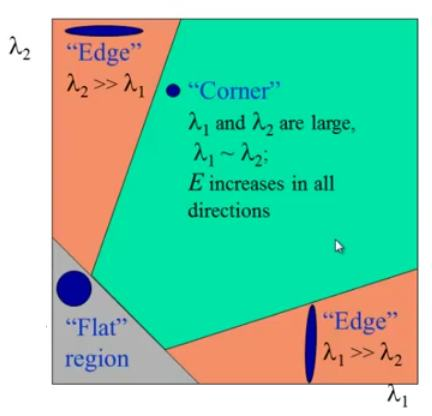

$\lambda_1$, $\lambda_2$ là các trị riêng, từ giá trị của các trị riêng này, ta tính ra hàm R, với k là hệ số của thuật toán để xác định ra được nào là cạnh, nào là góc. Còn vì sao nó liên hệ thì nhắc lại đstt đó là det = tích các trị riêng và trace = tổng các trị riêng. 
* Nếu |R| nhỏ, phần không gian ta tính là "phẳng", tức không có cạnh góc gì hết
* R << 0 thì $\lambda_1$ << $\lambda_2$ hoặc ngược lại, tức là khu vực này là cạnh
* R lớn, tức $\lambda_1$ và $\lambda_2$ lớn và gần bằng nhau, tức khu vực này là góc

Vậy là đủ hại não rồi ha :>, giờ là ứng dụng nó:

OpenCV có hàm cv2.cornerHarris():

* img - Hình vào, thuowgnf được convert thành gray và có kiểu float32.
* blockSize - Độ lớn của cửa sổ (thường hình vuông nên để là 1 số thôi nhé :v)
* ksize - Độ lớn của toán tử Sobel.
* k - Hệ số k của thuật toán.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

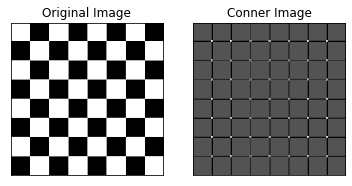

In [2]:
filename = 'chessboard.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04) 

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap = 'gray')
plt.title('Conner Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
print(dst)
print(dst.shape)
print(dst.min())
print(dst.max())
print(np.argmax(dst))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(225, 225)
-169130020.0
347701220.0
6273


Các bạn đã thấy thuật toán Harris Conner đã tách được cạnh và góc ra khỏi hình này, các giá trị cạnh và góc là các giá trị max

để hiển thị các góc không thôi thì ta cần dùng một thuật toán biến đổi hình thái ảnh là làm giãn (dilate) 

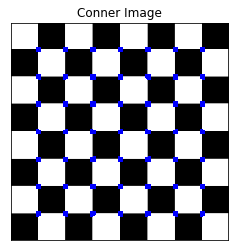

In [4]:
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img,cmap = 'gray')
plt.title('Conner Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Cài đặt thuật toán Harris Corner

Chúng ta sẽ thử cài thuật toán này :v, thực ra thì không có ích gì lắm, cơ mà mình thấy mấy trường khác học có cái mà mình học không có, cả môn thị giác máy với môn xử lý ảnh mình học qua đều không có món này, nên chắc các bạn làm bài này để ít ra cũng hiểu rõ hơn Python
# Đây sẽ là một bài tập :v, đáp án ở dưới.
*Gợi ý: xài hàm Sobel và hàm tính convolution của OpenCV*

Các bạn có thể thấy thuật toán hoạt động tốt :3, thuật toán này và các thuật toán feature detection khác được sử dụng trong việc ghép ảnh (ảnh 360 độ) hoặc object detection cũng được.

## Thuật toán SIFT (Scale-Invariant Feature Transform)
Nhược điểm của Harris Conner là nó không thể scale được, tức ảnh khi bị scale sẽ không thể detect được cạnh, đồng thời cũng có nghĩa nó chỉ có thể xác định cạnh và góc ở một mức độ nào đó, dĩ nhiên xoay ảnh không ảnh hưởng đến Harris.
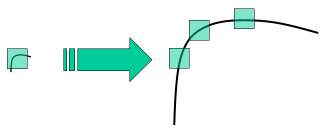


Để thực hiện thuật toán có tính năng tránh được việc scale ảnh hưởng thì cách xử lý của thuật toán này như sau:
    
1. Scale-space Extrema Detection
Bước này áp dụng một phép convolution lên ảnh ở các scale khác nhau để xác định được đặc điểm (keypoint) của ảnh, việc scale này cũng giúp cho thuật toán có tính "chịu scale".

Phương pháp thực hiện là áp dụng 2 bộ lọc Gaussian Blur với kì vọng (trung bình của phân phối chuẩn https://vi.wikipedia.org/wiki/Ph%C3%A2n_ph%E1%BB%91i_chu%E1%BA%A9n) khác nhau lên một ảnh và trừ cho nhau, đây được gọi là Differental of Gaussian, là cách tính đơn giản của toán tử Laplacian cho phân phối Gaussian (LOG) (học tron xác suất thống kê + giải tích 2), tham khảo: http://fourier.eng.hmc.edu/e161/lectures/gradient/node8.html

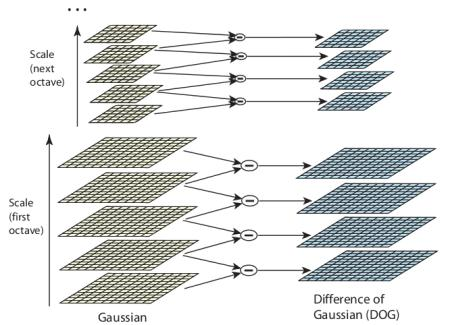

Với thuật toán toán tử LOG có kì vọng nhỏ thì sẽ detect cạnh (góc) nhỏ tốt hơn và với LOG có kì vọng nhỏ thì detect cạnh (góc) lớn tốt hơn.

Sau quá trình này thì ta sẽ có các giá trị của DoG tiềm năng để trở thành "keypoint" cho quá trình detect tiếp theo, mỗi quá phần tử được so sánh với các phần tử xung quanh để tìm điểm lớn nhất.

Scale factor cho thuật toán này là k = $\sqrt(2)$, kì vọng = 1.6

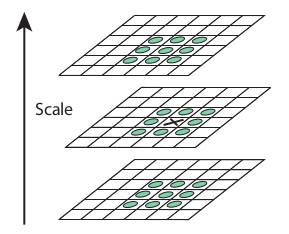

2. Keypoint Localization

Thuật toán thực hiện đánh dấu vị trí của cá keypoint trong ảnh, độ chính xác được bổ sung nhờ sử dụng thêm khai triển Taylor (đọc thêm trong báo :> )

Để lọc các điểm có giá trị nhỏ hơn một threshold nào đó, tác giả sử dụng một threshold là constractThreshold để lọc những thành phần keypoint có giá trị nhỏ hơn mức nào đó (ở đây là 0.03)

Phép DoG có điểm bất lợi là nó tập trung nhiều vào cạnh hơn, nên với phương pháp giống thuật toán Harris, tác giả cũng tính đạo hàm và sử dụng hàm gần tương tự hàm đã xét ở trên để lọc các cạnh ra. Trong bản cài của OpenCV, hằng số này gọi là edgeThreshold, mặc định = 10



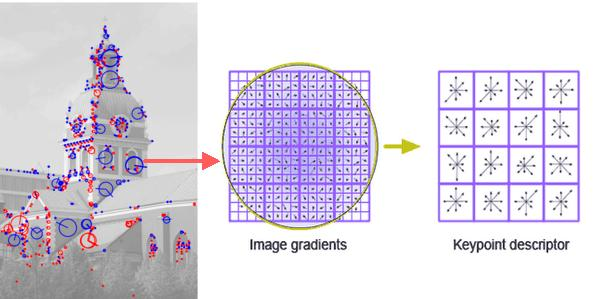

3. Orientation Assignment

Các keypoint sẽ được gán cho một giá trị góc độ tương đối so với các góc khác nhắm mục đích khiến cho các keypoint này bất biến dù cho đối tượng matching có xoay so với ban đầu. (Tính chất này đã được sử dụng trong luận văn của một anh trong CLB :> ).

4. Keypoint Descriptor
Bây giờ từ các thông tin về vị trí và hướng của cá keypoint, chúng ta có thể tạo ra mô tả về các keypoint, mỗi keypoint sẽ có một vùng 16 * 16 pixel bao quanh, được chia thành 16 block nhỏ 4 * 4, mỗi block nhỏ như vậy thì 8 vector hướng được tạo ra, do đó tổng cộng có 128 giá trị cần lưu, chúng tạo thành các vector để lưu vào mô tả của thuật toán. Từ các thông tin này, ta có thể tìm được scale của đối tượng, hoặc góc quay của đối tượng.

5. Keypoint Matching
Keypoints giữa 2 hình sẽ được match bằng cách tìm hàng xóm gần nhất, tuy nhiên một số trường hợp keypoints gần nhất thứ 2 lại quá gần cái thứ 1, có thể do nhiễu hoặc các vấn đề gì đó, trong trường hợp đó, tỉ số của cái gần nhất và cái thứ 2 được tính, nếu > 0.8 thì bỏ. Trong bài báo, việc này giảm 90% false match, trong khi chỉ bỏ 5% trường hợp đúng.

### Vậy là quá đủ haị nào :>, vào việc code thôi

À mà thuật toán này hơn ngon nên ông tác giả đăng kí bản quyền, các bạn cần cài downgrade opencv xuống 3.3 để dùng, hãy chắc chắn là mình đang ở trong vituralenv khi thực hành.Chạy câu lệnh bên dưới:

In [11]:
pip install opencv-python==3.4.2.17 opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 30.6 MB 2.2 MB/s eta 0:00:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 3.3.0.10
    Uninstalling opencv-python-3.3.0.10:
      Successfully uninstalled opencv-python-3.3.0.10
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 3.3.0.10
    Uninstalling opencv-contrib-python-3.3.0.10:
      Successfully uninstalled opencv-contrib-python-3.3.0.10
Note: you may need to restart the kernel to use updated packages.


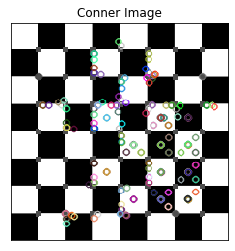

In [12]:

gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

cv2.drawKeypoints(gray,kp,img)

plt.imshow(img,cmap = 'gray')
plt.title('Keypoints Image'), plt.xticks([]), plt.yticks([])
plt.show()

Để xác định được các keypoint chúng ta sử dụng các câu lệnh sau:


In [14]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)

In [27]:
print(len(kp))
print(kp[1].angle) # Đọc góc của keypoint 1
print(kp[1].pt) # Đọc tọa độ của keypoint 1
#Phương pháp này cũng dùng được với Harris và các thuật toán template matching vì cùng là đối tượng keypoint
des = np.array(des)
print(des.shape)

#Tham khảo: https://docs.opencv.org/3.4/d2/d29/classcv_1_1KeyPoint.html

166
2.9671630859375
(141.49732971191406, 37.73331069946289)
(166, 128)


Sift có rất nhiều ứng dụng, và trước thời kì deep learning nó là state-of-art của bài toán object detection, cơ mà giờ thì với deep learning thì computer vision thường đứa nào cũng ăn hành thôi xD, nhưng thực sự việc học computer vision bình thường rất có ích, vì không phải cái gì cũng phang machine learning, deep learning vào.

Ngoài ra còn có thuật toán ORB, SURF trong chủ đề feature matching này, cơ mà mình đuối với mấy cái lý thuyết rồi nên chúng ta chỉ coi ứng dụng thôi.

## Feature matching để tìm vật thể

### Brute Force matching 

Bạn nào có quá khứ đen tối hack wifi chắc biết Brute Force là gì :))) nói chung là tìm và so sánh vơi nhau thôi

In [38]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage

# Initiate SIFT detector (như một cơn gió, code này mình cop ở trang opencv mà nó vẫn để SIFT)
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None) # Tìm ra 2 cái keypoint của 2 hình 
kp2, des2 = orb.detectAndCompute(img2,None)

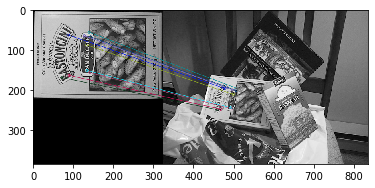

(<matplotlib.image.AxesImage at 0x7fd3de4ca940>, None)

In [41]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # 

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.zeros(img1.shape)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],img3, flags=2) # hàm này là của opencv3.4, khá chuối vì img3 có ở 2 chỗ

plt.imshow(img3),plt.show()

Đoạn chương trình trên đã thực hiện matching các key đúng với nhau rồi :3, ngoài ra còn có các cách khác để match, ví dụ như FLANN matcher, có sử dụng thêm kNN, tuy nhiên đây không phải trọng tâm của mình các bạn tham khảo thêm ở: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html

### Detect object bằng SIFT feature matching

Ta thực hiện tìm 2 feature như phần ORB lúc trước và FLANN matcher + tỉ lệ đã nói ở link trên

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10                    # Số match tối thiểu để xét 2 vật thể là 1

img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Lưu các keypoint match tốt vào list good
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

Tiếp theo để thực hiện tìm và match 2 đối tượng với nhau, ta sử sẽ đếm 

In [44]:
if len(good)>MIN_MATCH_COUNT:  
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2) # mảng các điểm match của hình 1 
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2) # mảng các điểm match của hình 2

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0) # Hàm tìm phép biến đổi từ hình 1 -> hình 2 dùng RANSAC
    matchesMask = mask.ravel().tolist()  # Sau khi tìm được ma trận biến đổi (phép scale và phép xoay)

    h,w = img1.shape    
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2) # Các điểm góc của hình gốc để vẽ đường bao
    dst = cv2.perspectiveTransform(pts,M)  # Thực hiện phép biến đổi 

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA) # Vẽ đường bao

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

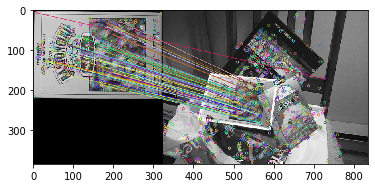

(<matplotlib.image.AxesImage at 0x7fd3de48ff28>, None)

In [47]:
# draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                    singlePointColor = None,
#                    matchesMask = matchesMask, # draw only inliers
#                    flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None)

plt.imshow(img3, 'gray'),plt.show()

Để sử dụng tốt feature matching thì đối tượng của chúng ta phải mang nhiều đặc điểm đặc trưng, đồng thời không thay đổi (ví dụ như người thì không cởi áo ra), đồng thời cũng phải có một hình đủ đặc điểm được track trước khi xử lý. Vì vậy chúng ta cần phải lấy được vị trí của vật thể. Để làm điều này OpenCV có hàm getROI:

im = cv2.imread('box_in_scene.png',0)
r = cv2.selectROI(im)
imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

cv2.imshow("Image", imCrop)
k = cv2.waitKey(5) & 0xFF
if k == 27:
    cv2.destroyAllWindows()

### Không chạy được trên jupyter nên để ra file .py rồi chạy.
## Đến đây mình có bài tập: Dùng ROI và SIFT để detect object bất kì (tốt nhất là sách) trên webcam


In [96]:
def Harris_Conner(img,window = 2,k = 0.04):
    ####################
    # img: hình đưa vào
    # window: kích thước cửa sổ
    # k: hệ số k
    ####################
    h,w = img.shape
    R = np.zeros((h,w))
    dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) #tính đạo hàm theo hướng x, size = 3
    dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) #tính đạo hàm theo hướng y, size = 3
    
    
    d2x = dx ** 2 # tính thành phần đạo hàm của Taylor
    d2y = dy ** 2 
    dxy = dx * dy # lưu ý phép nhân này là nhân từng số với nhau, nhân ma trận là np.dot()
    
    print(dx.shape)
    # Để tính cửa sổ, ta có thể dùng vòng for, cơ mà lười lắm nên ta sẽ xài hàm convolute :)), cơ bản là nó 
    # quét qua hết các lớp thôi 
    
    kernel = np.ones((window,window)) # Quét một cửa sổ toàn số 1 cũng giống bước cộng toàn bộ của thuật toán 
    
    i2x = cv2.filter2D(d2x, -1, kernel)# Hàm tính convolution 
    i2y = cv2.filter2D(d2y, -1, kernel)
    ixy = cv2.filter2D(dxy, -1, kernel)
    
    for i in range(h):
        for j in range(w):
            M = np.matrix([[i2x[i,j],ixy[i,j]] , [ixy[i,j],i2y[i,j]] ],dtype=np.float64)
            R[i,j] = np.linalg.det(M) - k * (np.power(np.trace(M), 2))# Thay vì xài vector riêng thì xài công thức này

    return R

(225, 225)
4161600.0
(225, 225)
6273


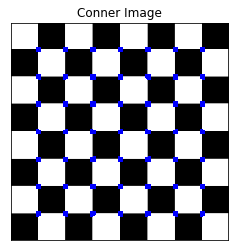

In [99]:
R = Harris_Conner(gray,window = 2,k = 0.04)
print(np.argmax(R))

img[R>0.01*R.max()]=[0,0,255]

plt.imshow(img,cmap = 'gray')
plt.title('Conner Image'), plt.xticks([]), plt.yticks([])
plt.show()